
<h1 style="text-align: center;">Trabajo Práctico Nº 3</h1>

In [52]:
import cv2
import matplotlib.pyplot as plt
import os 
import numpy as np
from skimage import data, util, img_as_float
from skimage.util import random_noise
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle

# Ejercicio 1

 ### a) Para el siguiente ejericio se eligió una imagen satelital de Rada Tilly - Chubut, conseguida a traves de Google Maps.

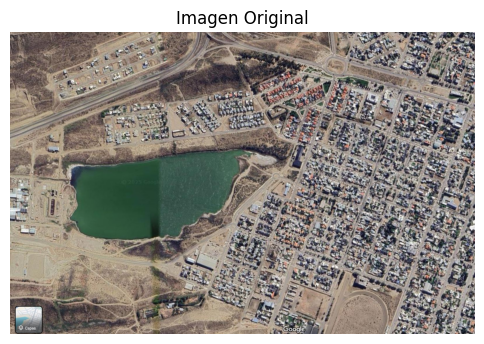

In [53]:
# Leer la imagen en color
imagen = cv2.imread('rada_tilly.jpeg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


# Verificar si la imagen se ha cargado correctamente
if imagen is None:
    print("Error al cargar la imagen.")
    exit()

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.show()

### Umbralización manual

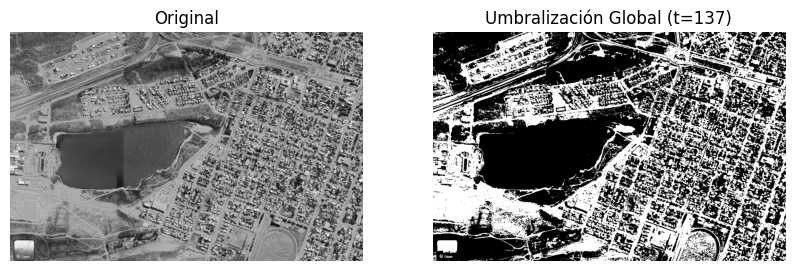

In [54]:

# Cargar imagen en escala de grises
imagen_1 = cv2.imread('rada_tilly.jpeg', cv2.IMREAD_GRAYSCALE)

# Verificación básica
if imagen_1 is None:
    raise ValueError("La imagen no se pudo cargar. Verificá el path o el nombre del archivo.")

# Defino el umbral manualmente
umbral = 137

# Crear una copia vacía de la imagen (misma forma)
umbralizada = np.zeros_like(imagen_1)

# Aplicar umbral 
for i in range(imagen_1.shape[0]):
    for j in range(imagen_1.shape[1]):
        if imagen_1[i, j] > umbral:
            umbralizada[i, j] = 255
        else:
            umbralizada[i, j] = 0

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_1, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(umbralizada, cmap='gray')
plt.title(f"Umbralización Global (t={umbral})")
plt.axis('off')
plt.show()


En este apartado se realizó una umbralización seleccionando el valor del umbral de forma manual (137), sin aplicar ningún criterio óptimo. El valor elegido fue arbitrario, a modo de prueba. Para ello, se implementó un algoritmo que recorre cada píxel de la imagen (ya convertida a escala de grises) y asigna el valor 255 si el píxel es mayor al umbral seleccionado, o 0 en caso contrario. De esta manera, se genera una imagen binaria compuesta únicamente por píxeles blancos y negros.


### Umbralización global
A continuacion lo que se intenta encontrar es el umbral optimo de la imagen utilizada. Para ello se implementaria el siguiente algortimo:
1) Inicialización:
   Se selecciona un valor inicial de umbral T (por ejemplo, 137 el utilizado en el apartado anterior ), dentro del rango 0–255. 
   También se define delta_T, que representa el cambio mínimo permitido entre iteraciones para considerar que el proceso ha convergido.

2) Iteración hasta la convergencia:
   Mientras la diferencia entre el nuevo umbral T y el valor anterior (T_prev) sea mayor o igual a delta_T, 
   se repiten los pasos siguientes.

3) Clasificación de los píxeles:
   - G1: píxeles con intensidad mayor que T.
   - G2: píxeles con intensidad menor o igual que T.

4) Cálculo de las medias:
   Se calcula la media de intensidad de cada grupo. 
   Si alguno de los grupos está vacío, se le asigna 0 como valor medio para evitar errores.

5) Actualización del umbral:
   El nuevo valor de T se define como el promedio entre las dos medias m1 (de G1) y m2 (de G2).

6) Aplicación del umbral final:
   Cuando el cambio entre iteraciones es menor que delta_T, se considera que el umbral ha convergido. 
   Se aplica ese valor a la imagen para obtener una versión binaria en blanco y negro.


Umbral final después de la convergencia: 119
Umbral calculado por Global: 119.0


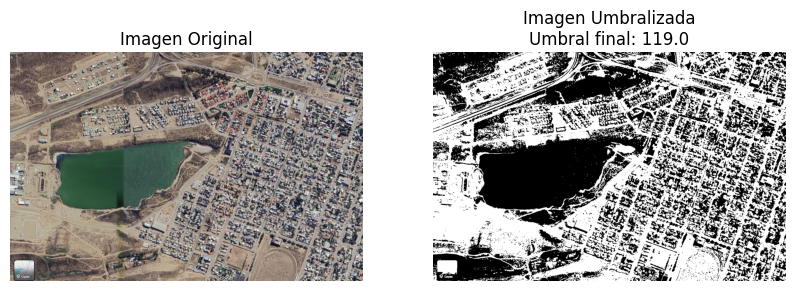

In [55]:
# Cargar la imagen en escala de grises

imagen = cv2.imread('rada_tilly.jpeg', cv2.IMREAD_GRAYSCALE)


# Paso 1: Seleccionar un umbral inicial
T = 137  # Umbral inicial 
delta_T = 1  # Diferencia mínima entre valores de T sucesivos
T_prev = 0  # Para almacenar el umbral anterior y verificar la convergencia

while abs(T - T_prev) >= delta_T:
    T_prev = T

    # Paso 2: Umbralizar la imagen usando T
    G1 = imagen[imagen > T]  # Grupo de píxeles con intensidad mayor a T
    G2 = imagen[imagen <= T] # Grupo de píxeles con intensidad menor o igual a T

    # Paso 4: Calcular m1 y m2
    if len(G1) > 0:
        m1 = np.mean(G1)
    else:
        m1 = 0

    if len(G2) > 0:
        m2 = np.mean(G2)
    else:
        m2 = 0

    # Paso 5: Actualizar el umbral T
    T = int((m1 + m2) / 2)

# Imprimir el valor final de umbral
print(f"Umbral final después de la convergencia: {T}")

# Aplicar el umbral final a la imagen
umbral_valor, thresholded_image = cv2.threshold(imagen, T, 255, cv2.THRESH_BINARY)

# Imprimir el valor de umbral calculado por Global
print(f"Umbral calculado por Global: {umbral_valor}")

# Visualizar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen umbralizada
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Imagen Umbralizada\nUmbral final: {umbral_valor}')
plt.axis('off')

plt.show()

Se implementó el cálculo del umbral óptimo de forma manual utilizando un método iterativo basado en la media de dos grupos de píxeles (mayores y menores al umbral actual). Una vez obtenido el umbral final, se aplicó también el método cv2.threshold con ese mismo valor para verificar la consistencia. Ambos métodos produjeron el mismo valor del umbra (119).

### b) Método de umbralización de Otsu

In [56]:
# Cargar la imagen en escala de grises
image = cv2.imread('rada_tilly.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

Umbral calculado por Otsu: 119.0


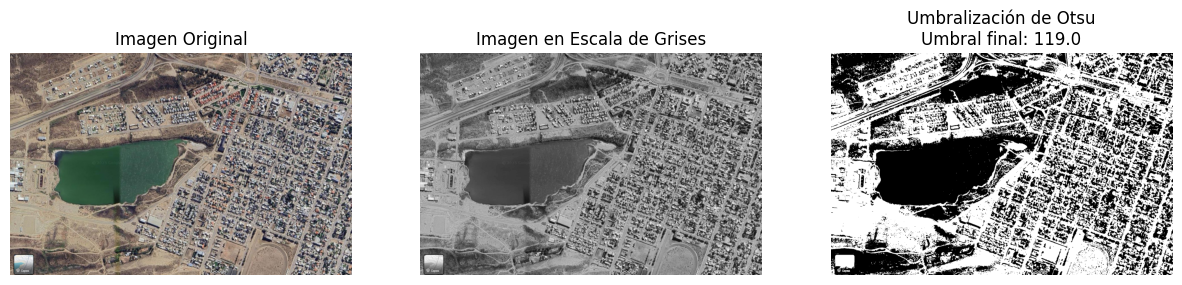

In [57]:
# Aplicar el método de umbralización de Otsu
umbral_valor, umbral_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Imprimir el valor de umbral calculado por Otsu
print(f"Umbral calculado por Otsu: {umbral_valor}")

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(15, 5))

# Imagen en color original
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title(f"Umbralización de Otsu\nUmbral final: {umbral_valor}")
plt.axis("off")

plt.show()

Se aplicó el método de umbralización de Otsu, que determina automáticamente el valor de umbral óptimo analizando la distribución de niveles de gris de la imagen. Otsu evalúa todos los umbrales posibles (de 0 a 255) y selecciona aquel que maximiza la separación entre los dos grupos resultantes, es decir, aquel que genera la mayor varianza entre clases.

En este caso, el valor calculado por Otsu coincidió con el obtenido previamente mediante el método global iterativo, lo cual indica que ambos enfoques identificaron el mismo umbral como óptimo para binarizar esta imagen.
